## Segmentasyon ve Süperpiksel algoritmaları

Çalışma kapsamında popüler görüntü bölümleme yöntemleri karşılaştırılmıştır. İyi segmentasyonlar elde etmek zor olduğundan ve 'iyi' tanımı genellikle uygulamaya bağlı olduğundan, bu yöntemler genellikle süperpiksel olarak da bilinen bir aşırı segmentasyon elde etmek için kullanılır. Bu süper pikseller daha sonra "conditional random fields"(CRF) gibi daha karmaşık algoritmalar için bir temel görevi görür.

## Felzenszwalb's efficient graph based segmentation

Algoritma sadece segment size'na etki eden ``scale`` parametresine sahiptir. Gerçek boyut ve segment size'ı, yerel kontrasta bağlı olarak büyük ölçüde değişebilir.

## Quickshift Görüntü Segmentasyonu

Quickshift, approximation of kernelized mean-shift yaklaşımına dayanan 2D görüntü bölümleme algoritmasıdır. Local mode-seeking algoritmaları ailesine aittir.

Quickshift artılarından biri, aynı anda birden fazla ölçekte hiyerarşik bir segmentasyonu hesaplamasıdır.

Quickshift'in iki ana parametresi vardır: 
``sigma``controls the scale of the local density approximation.
``max_dist`` üretilen hiyerarşik bölümlemede bir seviye seçer. 

## SLIC - K-Means based image segmentation

Bu algoritma, renk bilgisi ve görüntü konumunun 5d uzayında basitçe K-means gerçekleştirir ve bu nedenle quickshift ile yakından ilgilidir. Kümeleme yöntemi daha basit olduğu için çok verimlidir. Bu algoritmanın iyi sonuçlar elde etmek için Lab renk uzayında çalışması önemlidir. Algoritma hızla ivme kazandı ve şimdi yaygın olarak kullanılıyor. ``compactness`` parametresi, Hızlı Kaydırma durumunda olduğu gibi renk benzerliği ve yakınlığını değiştirirken, ``n_segments`` kortalar için merkez sayısını seçer.


## Compact watershed segmentation of gradient images

Renkli input yerine, parlak piksellerin bölgeler arasındaki sınırı ifade ettiği bir grayscale görüntüyü girdi olarak alır. Algoritma, görüntüyü, parlak piksellerin yüksek zirveler oluşturduğu bir manzara olarak görür. 


Felzenszwalb number of segments: 78
SLIC number of segments: 237
Quickshift number of segments: 110


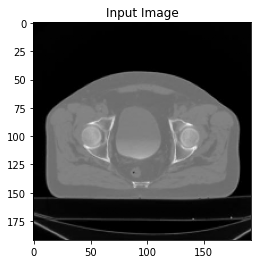

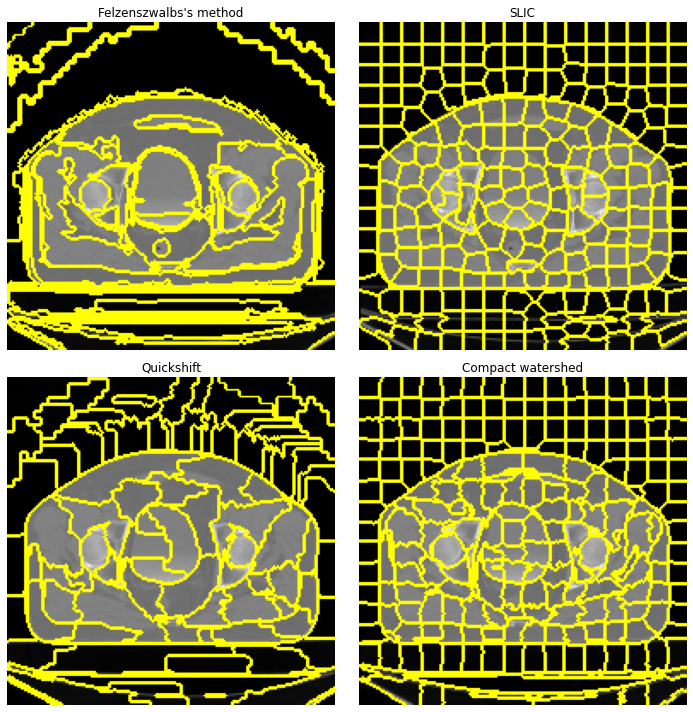

In [1]:
import matplotlib.pyplot as plt
import skimage
import skimage.io as io
import numpy as np

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = skimage.img_as_float(skimage.io.imread("1.jpeg"))[::2, ::2]

imgplot = plt.imshow(img)
plt.title('Input Image')

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()